# Cross-match LAMOST DR4 red clumps with Gaia DR2

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
# Read LAMOST DR4 with Gaia cross-match data
lamostdatafile = "../data/lamost/LMRC-DR4-VF-SNR30.csv"
lamostdata = pd.read_csv(lamostdatafile)
nstars = len(lamostdata)
print list(lamostdata)

SyntaxError: invalid syntax (<ipython-input-2-16f3c0ca10a9>, line 5)

In [73]:
# Go through LAMOST data and keep the Gaia match with the lowest astrometric excess noise
imatch    = np.zeros(nstars,dtype=int) # Index of Gaia match with lowest astrometric excess noise
gaiamatch = np.ones(nstars,dtype=bool) # Whether Gaia match exists
for jstars in range(nstars):
    index = np.where(crossmatch["id"]==lamostdata["ID"][jstars])       
    if (len(index[0])>1):
        noise = crossmatch["astrometric_excess_noise"][index[0]].data
        iminnoise = (noise==np.min(noise))
        tmp = index[0][iminnoise]
        if (np.sum(tmp)>1):
            imatch[jstars] = tmp[0]
        else:
            imatch[jstars] = tmp
    elif (len(index[0])==1):
        imatch[jstars] = index[0]
    else:
        imatch[jstars] = 0
        gaiamatch[jstars] = False

[ True  True  True ...  True  True  True]


In [78]:
# Add appropriate columns to LAMOST dataframe
lamostdata["gaiadr2_ra"]                  = crossmatch["ra"][imatch]
lamostdata["gaiadr2_ra_error"]            = crossmatch["ra_error"][imatch]
lamostdata["gaiadr2_dec"]                 = crossmatch["dec"][imatch]
lamostdata["gaiadr2_dec_error"]           = crossmatch["dec_error"][imatch]
lamostdata["gaiadr2_parallax"]            = crossmatch["parallax"][imatch]
lamostdata["gaiadr2_parallax_error"]      = crossmatch["parallax_error"][imatch]
lamostdata["gaiadr2_pmra"]                = crossmatch["pmra"][imatch]
lamostdata["gaiadr2_pmra_error"]          = crossmatch["pmra_error"][imatch]
lamostdata["gaiadr2_pmdec"]               = crossmatch["pmdec"][imatch]
lamostdata["gaiadr2_pmdec_error"]         = crossmatch["pmdec_error"][imatch]
lamostdata["gaiadr2_ra_dec_corr"]         = crossmatch["ra_dec_corr"][imatch]
lamostdata["gaiadr2_ra_parallax_corr"]    = crossmatch["ra_parallax_corr"][imatch]
lamostdata["gaiadr2_ra_pmra_corr"]        = crossmatch["ra_pmra_corr"][imatch]
lamostdata["gaiadr2_ra_pmdec_corr"]       = crossmatch["ra_pmdec_corr"][imatch]
lamostdata["gaiadr2_dec_parallax_corr"]   = crossmatch["dec_parallax_corr"][imatch]
lamostdata["gaiadr2_dec_pmra_corr"]       = crossmatch["dec_pmra_corr"][imatch]
lamostdata["gaiadr2_dec_pmdec_corr"]      = crossmatch["dec_pmdec_corr"][imatch]
lamostdata["gaiadr2_parallax_pmra_corr"]  = crossmatch["parallax_pmra_corr"][imatch]
lamostdata["gaiadr2_parallax_pmdec_corr"] = crossmatch["parallax_pmdec_corr"][imatch]
lamostdata["gaiadr2_pmra_pmdec_corr"]     = crossmatch["pmra_pmdec_corr"][imatch]
lamostdata["gaiamatch"]                   = gaiamatch

# Where there is not match with Gaia, replace Gaia columns with -9999
lamostdata["gaiadr2_ra"][~gaiamatch]                   = -9999
lamostdata["gaiadr2_ra_error"][~gaiamatch]             = -9999   
lamostdata["gaiadr2_dec"][~gaiamatch]                  = -9999     
lamostdata["gaiadr2_dec_error"][~gaiamatch]            = -9999       
lamostdata["gaiadr2_parallax"][~gaiamatch]             = -9999         
lamostdata["gaiadr2_parallax_error"][~gaiamatch]       = -9999   
lamostdata["gaiadr2_pmra"][~gaiamatch]                 = -9999               
lamostdata["gaiadr2_pmra_error"][~gaiamatch]           = -9999         
lamostdata["gaiadr2_pmdec"][~gaiamatch]                = -9999             
lamostdata["gaiadr2_pmdec_error"][~gaiamatch]          = -9999         
lamostdata["gaiadr2_ra_dec_corr"][~gaiamatch]          = -9999         
lamostdata["gaiadr2_ra_parallax_corr"][~gaiamatch]     = -9999    
lamostdata["gaiadr2_ra_pmra_corr"][~gaiamatch]         = -9999        
lamostdata["gaiadr2_ra_pmdec_corr"][~gaiamatch]        = -9999       
lamostdata["gaiadr2_dec_parallax_corr"][~gaiamatch]    = -9999   
lamostdata["gaiadr2_dec_pmra_corr"][~gaiamatch]        = -9999       
lamostdata["gaiadr2_dec_pmdec_corr"][~gaiamatch]       = -9999      
lamostdata["gaiadr2_parallax_pmra_corr"][~gaiamatch]   = -9999  
lamostdata["gaiadr2_parallax_pmdec_corr"][~gaiamatch]  = -9999 
lamostdata["gaiadr2_pmra_pmdec_corr"][~gaiamatch]      = -9999     

In [81]:
# Write dataframe to file
lamostdata.to_csv("../data/lamost/LMRC-DR4-VF-SNR30-Gaia.csv")

(-10.0, 10.0)

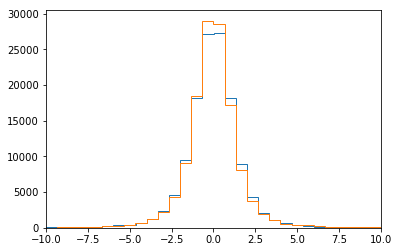

In [102]:
# Quick check of proper motions
dpmra = lamostdata["mra"]-lamostdata["gaiadr2_pmra"]
index = (~np.isnan(dpmra)) & (dpmra<10.) & (dpmra>-10.)
plt.hist(dpmra[index],30,histtype="step")
plt.xlim([-10.,10.])

dpmdec = lamostdata["mdec"]-lamostdata["gaiadr2_pmdec"]
index = (~np.isnan(dpmdec)) & (dpmdec<10.) & (dpmdec>-10.)
plt.hist(dpmdec[index],30,histtype="step")
plt.xlim([-10.,10.])